In [10]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from typing import Tuple, List

In [11]:
def get_available_bids(load_dir: str) -> List[str]:
    return [f.split("_")[0] for f in os.listdir(load_dir) if f.endswith("_domain.npy")]

def load_data(load_dir: str, bid: str) -> Tuple[np.ndarray, np.ndarray]:
    SIZE = 512
    u = np.zeros((SIZE + 2, SIZE + 2))
    u[1:-1, 1:-1] = np.load(os.path.join(load_dir, f"{bid}_domain.npy"))
    interior_mask = np.load(os.path.join(load_dir, f"{bid}_interior.npy"))
    return u, interior_mask

## Metadata

In [12]:
LOAD_DIR = "../data/modified_swiss_dwellings"

## Dataset Summary

In [13]:
all_bids = get_available_bids(LOAD_DIR)
print(f"There are {len(all_bids)} buildings available.")

There are 4571 buildings available.


## EDA

*Familiarize yourself with the data. Load and visualize the input data for a few floorplans using aseperate Python script, Jupyter notebook or your preferred to*

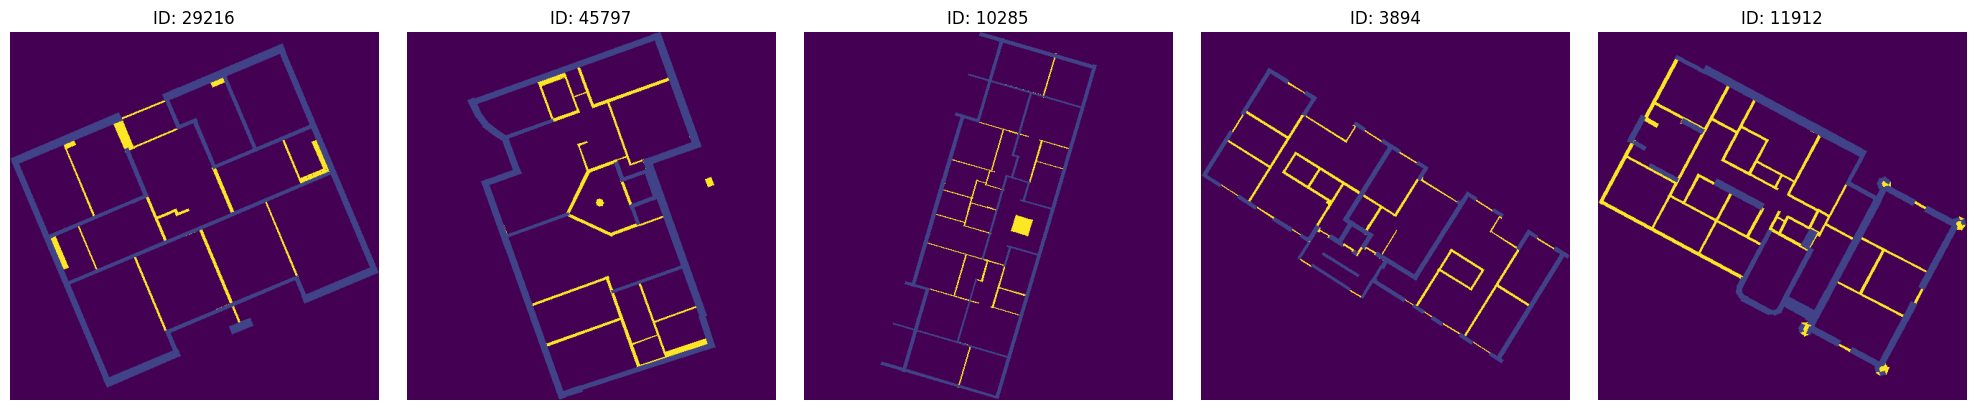

In [14]:
# Sample 5 building IDs
sample_bids = random.sample(all_bids, 5)

# Create a figure with 5 subplots in one row
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Load and plot each sampled building
for i, bid in enumerate(sample_bids):
    u, interior_mask = load_data(LOAD_DIR, bid)
    axes[i].imshow(u)
    axes[i].set_title(f"ID: {bid}")
    axes[i].axis('off')  # Remove axes for cleaner visualization

plt.tight_layout()
plt.show()